# Visualize Data

In [1]:
%%capture
%run 03_clean_data.ipynb


## 1. Histograms of quality distribiution for each of the wine type

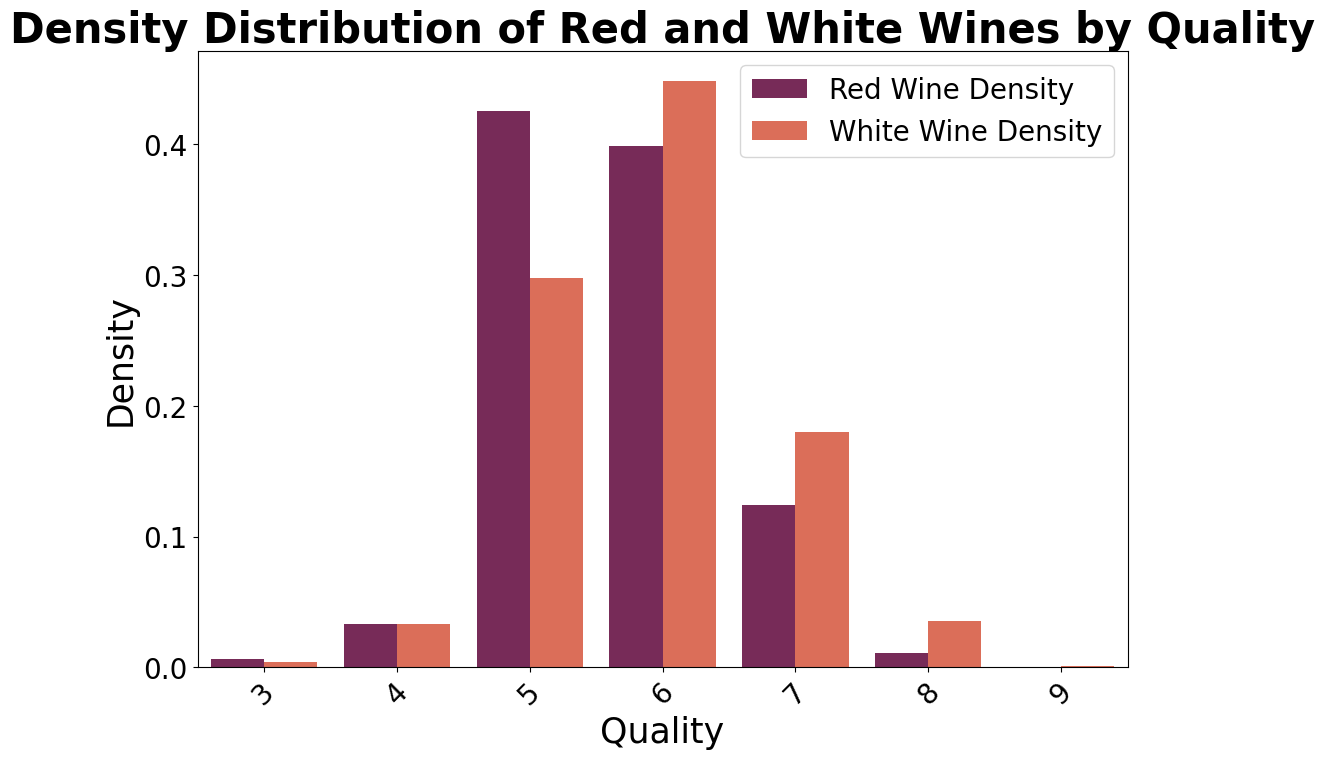

In [2]:
# getting quality counts for red and white wines and sort them by quality
red_quality_counts = df_red_wine['quality'].value_counts().sort_index()
white_quality_counts = df_white_wine['quality'].value_counts().sort_index()

# normalize the counts to get densities
red_density = red_quality_counts / red_quality_counts.sum()
white_density = white_quality_counts / white_quality_counts.sum()

# convert to DataFrame
red_df = red_density.reset_index().rename(columns={'index': 'Quality', 'quality': 'quality'})
white_df = white_density.reset_index().rename(columns={'index': 'Quality', 'quality': 'quality'})
merged_df = pd.merge(red_df, white_df, on='quality', how='outer').fillna(0)
bar_plot_df = merged_df.rename(columns={'count_x': 'Red Wine Density', 'count_y': 'White Wine Density'})

# match columns for both features
melted_df = pd.melt(bar_plot_df, id_vars='quality', var_name='Wine Type', value_name='Density')

# plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='quality', y='Density', hue='Wine Type', data=melted_df, palette='rocket')

# description
plt.title('Density Distribution of Red and White Wines by Quality', fontsize=30, weight ='bold')
plt.xlabel('Quality',  fontsize=25)
plt.ylabel('Density', fontsize=25)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

# save fig
plt.savefig('../figures/Density Distribution of Red and White Wines by Quality.png', bbox_inches = 'tight')
plt.show()

## 2. Raw Clustermap of our cleaned data

/usr/local/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


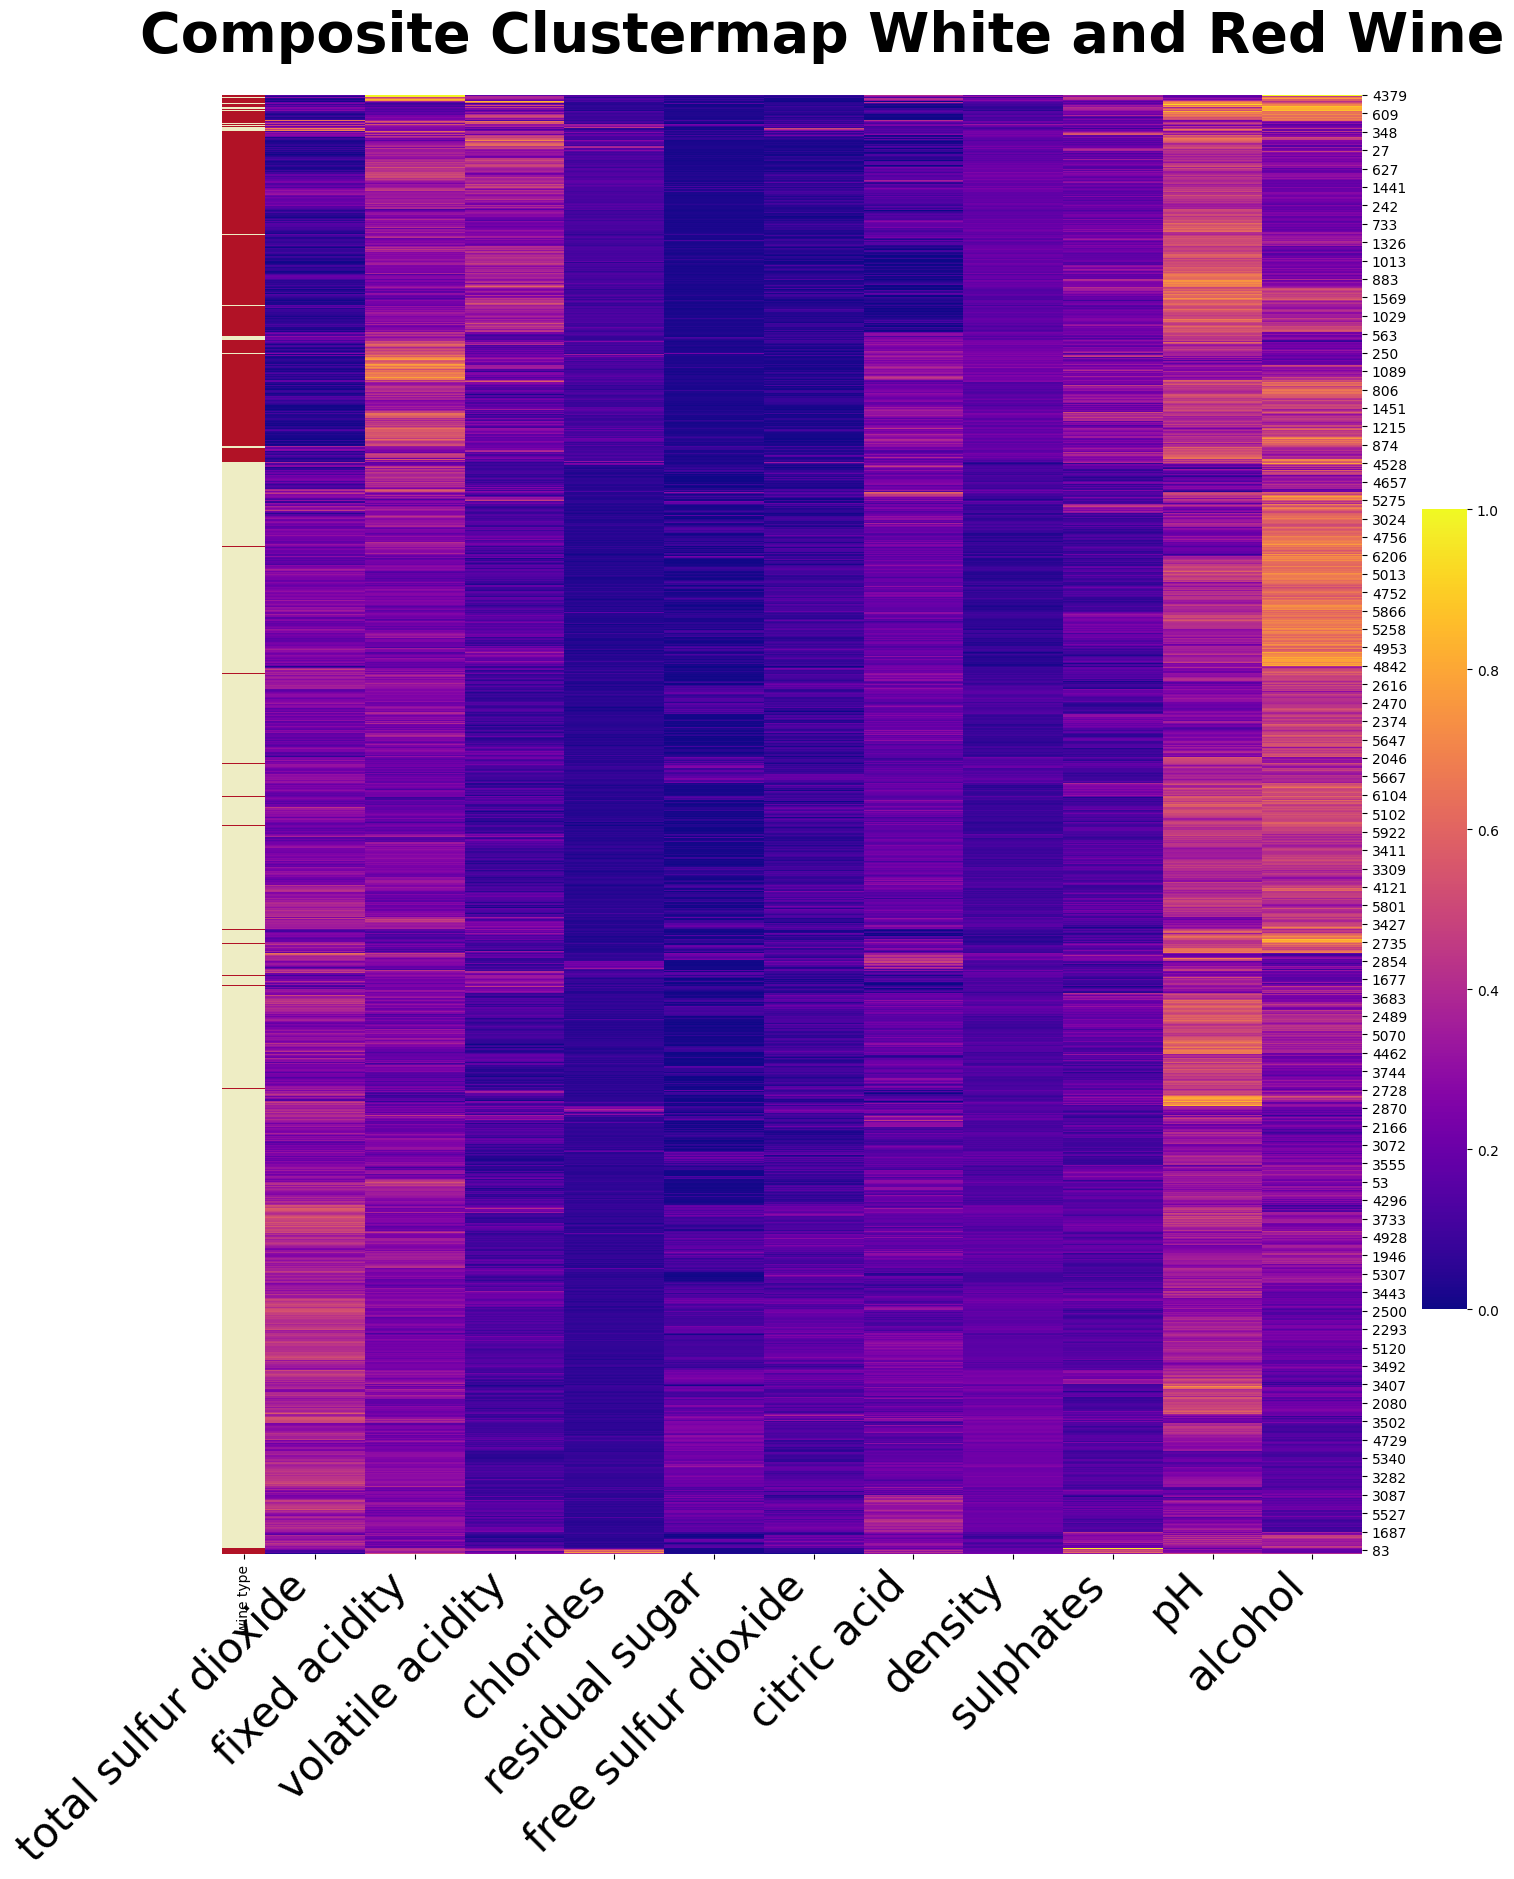

In [3]:
# create labels of color to our data
df_red_wine['color'] = 1
df_white_wine['color'] = 2

df_wine = pd.concat([df_red_wine, df_white_wine[1:]], axis=0).reset_index(drop=True)

def create_cluster_by_rows(dataset):
    '''
    Displays a clustermap plot with labels.

    Parameters:
    - dataset (pandas.DataFrame): The DataFrame containing data related to red and white wines.
    '''
    # select numerical columns from the dataset
    data = dataset.select_dtypes(include=['number'])

    # extract and remove the 'color' column from the data
    agerange = data.pop("color")

    # define color mapping for wine types labels
    colors_of_labels = {1: "#b11226", 2: "#EEEDC4"}

    # Map wine types to colors
    labels = agerange.map(colors_of_labels)
    df_with_labels = pd.DataFrame(data={'wine type': labels})

    # create the clustermap
    g = sns.clustermap(df_wine.iloc[:,:-2], cmap='plasma', row_colors=df_with_labels, annot_kws={'size': 30}, 
                standard_scale=1, figsize=(15, 20))

    # Hide row and column dendrograms 
    g.ax_row_dendrogram.set_visible(False)
    g.ax_col_dendrogram.set_visible(False)    

    # describe
    title = 'Composite Clustermap White and Red Wine'
    plt.suptitle('Composite Clustermap White and Red Wine', fontsize=40, weight ='bold',y= 0.85, x = 0.60)
    plt.setp(g.ax_heatmap.get_xticklabels(), fontsize=30, rotation = 45, ha='right')
    g.ax_cbar.set_position((1, .2, .03, .4))

    plt.savefig(f'../figures/{title}.png', bbox_inches = 'tight')
    plt.show()

create_cluster_by_rows(df_wine)
